In [ ]:
! pip install git+https://github.com/wittawatj/kernel-gof.git

  Cloning https://github.com/wittawatj/kernel-gof.git to /tmp/pip-req-build-c05eq82u
  Running command git clone -q https://github.com/wittawatj/kernel-gof.git /tmp/pip-req-build-c05eq82u
  Created wheel for kgof: filename=kgof-0.1.0-py3-none-any.whl size=44915 sha256=2721e2273303cafe93a3e201703d3acacc8b73a7209b966ba2ed020c9c368b3c
  Stored in directory: /tmp/pip-ephem-wheel-cache-nshl84la/wheels/2b/a7/11/101ba41641216ad2643f34672588a75886b6ea7150876ab329
Successfully built kgof


In [ ]:
# Catch-all import statements
import kgof
import kgof.data as data
import kgof.density as density
import kgof.goftest as gof
import kgof.kernel as kernel
import kgof.util as util
import matplotlib
import matplotlib.pyplot as plt
import autograd.numpy as np
import scipy.stats as stats

In [ ]:
d = 2
def isogauss_log_den(X):
  mean = np.zeros(d)
  variance = 1
  unden = -np.sum((X - mean)**2, 1)/(2.0 * variance)
  return unden

In [ ]:
# construct p as an unnormalized density object
p = density.from_log_den(d, isogauss_log_den)

In [ ]:
m = 1
np.random.seed(6)
n = 400
X = np.random.randn(n, 2) + np.array([m, 0])

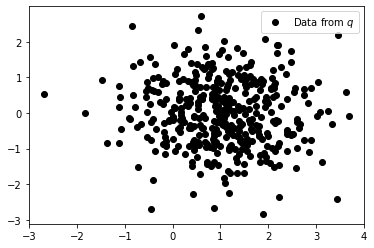

In [ ]:
plt.plot(X[:, 0], X[:, 1], 'ko', label='Data from $q$')
plt.legend()

In [ ]:
dat = data.Data(X)

In [ ]:
train, test = dat.split_tr_te(tr_proportion=0.2, seed=5)

In [ ]:
J = 1
opts = {
    'reg': 1e-2,
    'max_iter': 50,
    'tol_fun': 1e-7,
}
V_opt, gw_opt, opt_info = gof.GaussFSSD.optimize_auto_init(p, train, J, **opts)

In [ ]:
opt_info

{'fun': -0.46928579803153925,
 'hess_inv': <3x3 LbfgsInvHessProduct with dtype=float64>,
 'jac': array([-1.41610920e-06,  5.42336052e-07,  1.77049555e-05]),
 'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
 'nfev': 13,
 'nit': 9,
 'status': 0,
 'success': True,
 'time_secs': 0.18166851997375488,
 'x': array([ 2.10331391, -0.42809005, -0.09248535])}

In [ ]:
alpha = 0.05
fssd_opt = gof.GaussFSSD(p, gw_opt, V_opt, alpha)

In [ ]:
test_result = fssd_opt.perform_test(test)
test_result

{'alpha': 0.05,
 'h0_rejected': True,
 'n_simulate': 3000,
 'pvalue': 0.0,
 'test_stat': 81.98456242402355,
 'time_secs': 0.003679990768432617}

In [ ]:
# If m=0, then p=q and H_0 is true.
# m = 0
m = 0

# Draw n points from q
seed = 6
np.random.seed(seed)
n = 400
X = np.random.randn(n, 2) + np.array([m, 0])

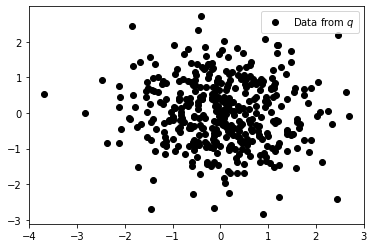

In [ ]:
plt.plot(X[:, 0], X[:, 1], 'ko', label='Data from $q$')
plt.legend()

In [ ]:
dat = data.Data(X)

In [ ]:
train, test = dat.split_tr_te(tr_proportion=0.2, seed=5)

In [ ]:
J = 1
opts = {
    'reg': 1e-2,
    'max_iter': 50,
    'tol_fun': 1e-7,
}
V_opt, gw_opt, opt_info = gof.GaussFSSD.optimize_auto_init(p, train, J, **opts)

In [ ]:
opt_info

{'fun': -0.03949434966474903,
 'hess_inv': <3x3 LbfgsInvHessProduct with dtype=float64>,
 'jac': array([-3.54248421e-07, -3.90911649e-07,  3.72378650e-08]),
 'message': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
 'nfev': 12,
 'nit': 10,
 'status': 0,
 'success': True,
 'time_secs': 0.10703444480895996,
 'x': array([3.98219259, 1.89340814, 1.86068057])}

In [ ]:
alpha = 0.05
fssd_opt = gof.GaussFSSD(p, gw_opt, V_opt, alpha)

In [ ]:
test_result = fssd_opt.perform_test(test)
test_result

{'alpha': 0.05,
 'h0_rejected': False,
 'n_simulate': 3000,
 'pvalue': 0.6626666666666666,
 'test_stat': -0.3491860461111926,
 'time_secs': 0.00611424446105957}